# Dataset source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

#### Problem Statement: 

### Identify Missing Values

In [9]:
import pandas as pd

# Load the dataset
heart_disease_df = pd.read_csv('heart_disease_uci.csv')

# Identifying missing values in each column
missing_values = heart_disease_df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


### Handling Missing Values

In [10]:
# Fill missing values for numerical columns with the median
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for column in numerical_columns:
    heart_disease_df[column].fillna(heart_disease_df[column].median(), inplace=True)

# Fill missing values for categorical columns with the mode
categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']
for column in categorical_columns:
    mode_value = heart_disease_df[column].mode()[0]
    heart_disease_df[column].fillna(mode_value, inplace=True)

### Exploratory Data Analysis (EDA)

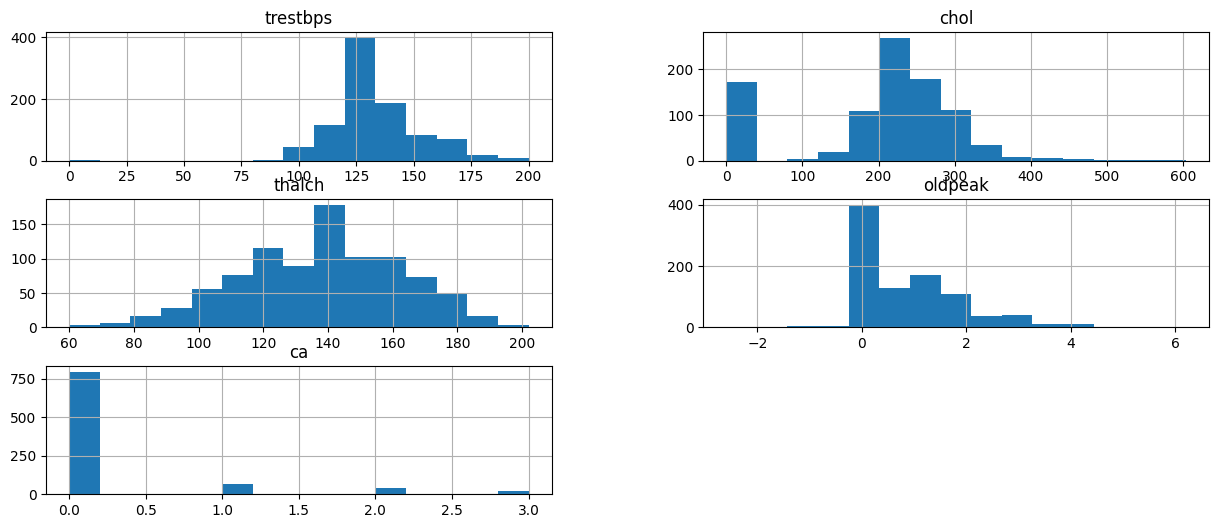

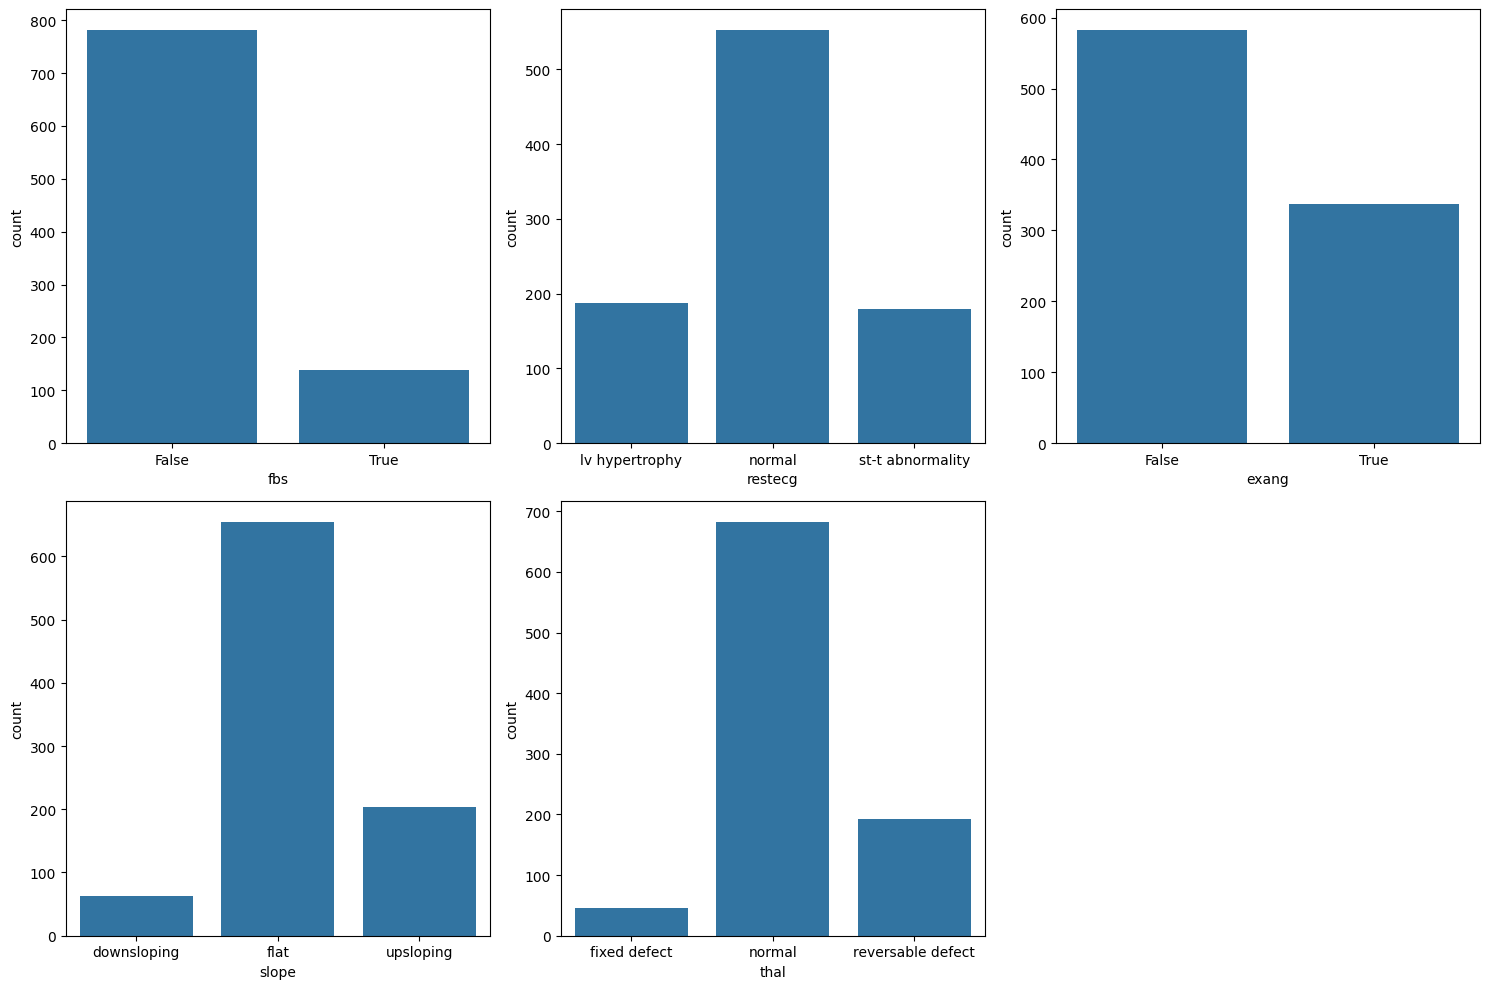

ValueError: could not convert string to float: 'Male'

<Figure size 1000x800 with 0 Axes>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms for numerical columns
heart_disease_df[numerical_columns].hist(bins=15, figsize=(15, 6))
plt.show()

# Count plots for categorical columns
plt.figure(figsize=(15, 10))
for index, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, index)
    sns.countplot(x=column, data=heart_disease_df)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(heart_disease_df.corr(), annot=True)
plt.show()

### Data Preparation for Modeling

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encoding categorical variables
heart_disease_df = pd.get_dummies(heart_disease_df, columns=categorical_columns, drop_first=True)

# Splitting the dataset
X = heart_disease_df.drop('num', axis=1)
y = heart_disease_df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'Female'

### Model Building and Evaluation

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset


# Handling Missing Values
# Numerical columns: Impute with median
num_imputer = SimpleImputer(strategy='median')
num_columns = heart_disease_df.select_dtypes(include=['int64', 'float64']).columns
heart_disease_df[num_columns] = num_imputer.fit_transform(heart_disease_df[num_columns])

# Categorical columns: Impute with mode (most frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_columns = heart_disease_df.select_dtypes(include=['object']).columns
heart_disease_df[cat_columns] = cat_imputer.fit_transform(heart_disease_df[cat_columns])

# Exploratory Data Analysis (EDA)
# Displaying histograms for numerical columns
heart_disease_df[num_columns].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.show()

# Displaying count plots for categorical columns
plt.figure(figsize=(15, 10))
for index, column in enumerate(cat_columns, 1):
    plt.subplot(2, 3, index)
    sns.countplot(x=column, data=heart_disease_df)
plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(heart_disease_df.corr(), annot=True, fmt='.2f')
plt.show()

# Data Preparation for Modeling
# Encoding categorical variables and scaling numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_columns),
        ('cat', OneHotEncoder(), cat_columns)
    ])

# Preparing the features and target variable
X = heart_disease_df.drop('num', axis=1)
y = heart_disease_df['num']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying transformations
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Model Building and Evaluation
# Using Logistic Regression as an example model
model = LogisticRegression()
model.fit(X_train_transformed, y_train)

# Making predictions
y_pred = model.predict(X_test_transformed)

# Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

ValueError: Layout of 2x3 must be larger than required size 8

<Figure size 1500x600 with 0 Axes>

### Data Cleaning Process

ValueError: could not convert string to float: 'Male'

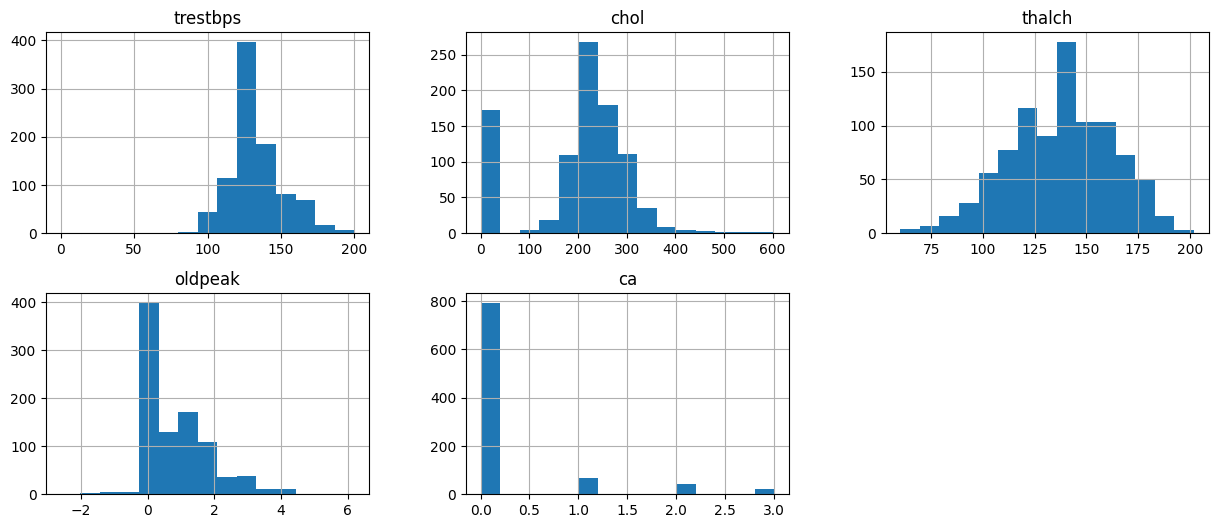

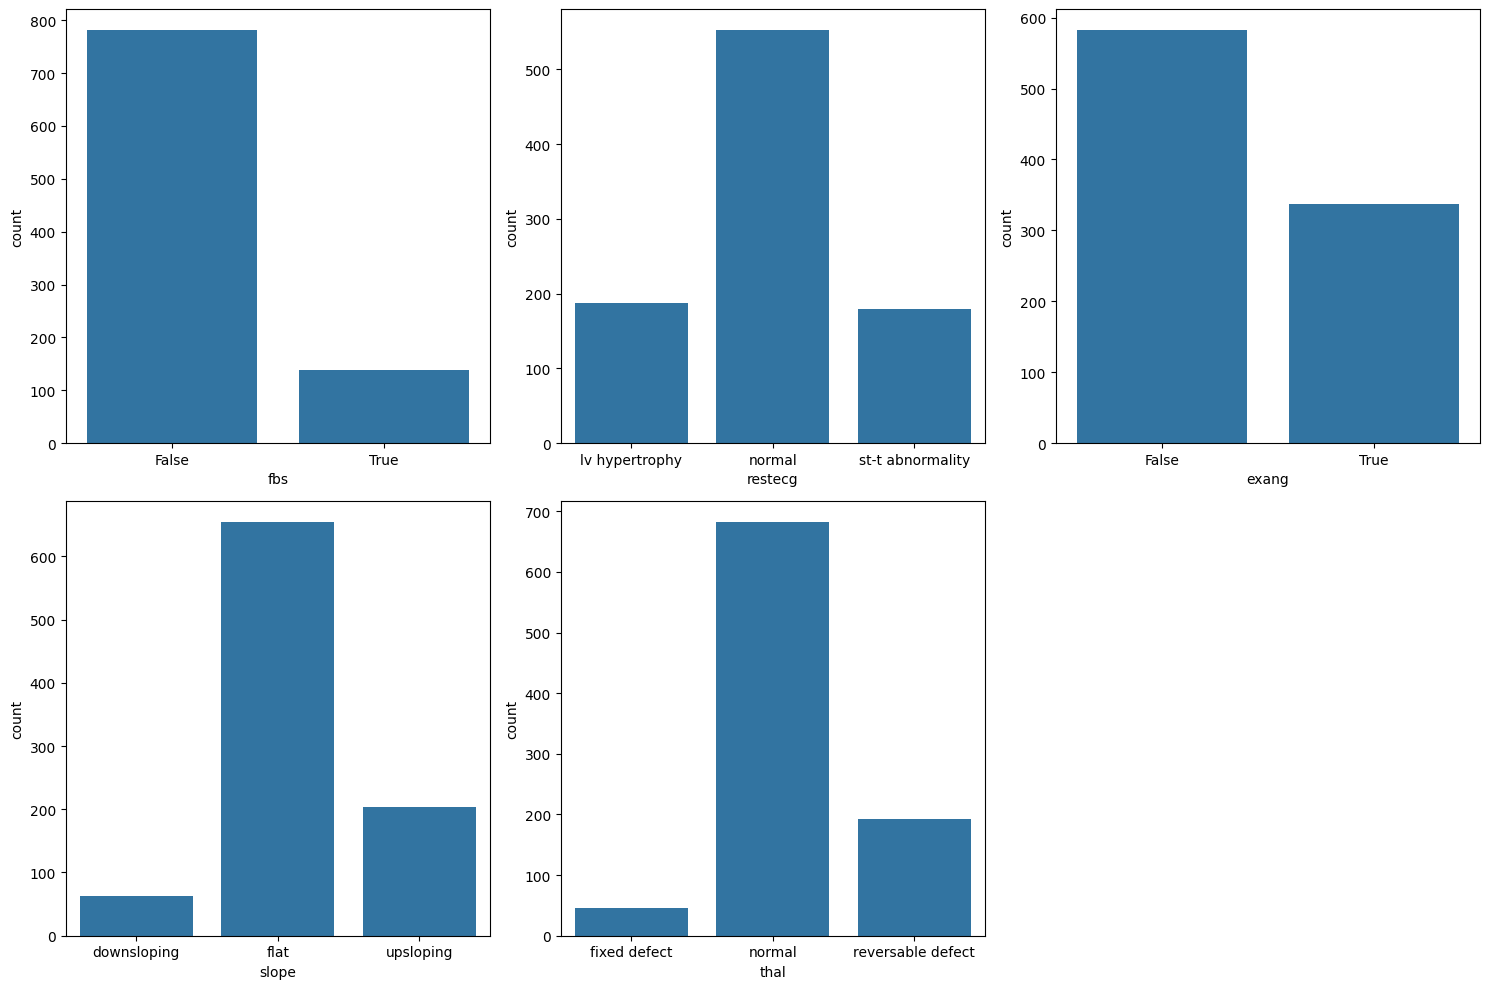

<Figure size 1000x800 with 0 Axes>

In [6]:
# Data Cleaning
# Fill missing values for numerical columns with the median
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
for column in numerical_columns:
    heart_disease_df[column].fillna(heart_disease_df[column].median(), inplace=True)

# Fill missing values for categorical columns with the mode
categorical_columns = ['fbs', 'restecg', 'exang', 'slope', 'thal']
for column in categorical_columns:
    mode_value = heart_disease_df[column].mode()[0]
    heart_disease_df[column].fillna(mode_value, inplace=True)

# Exploratory Data Analysis (EDA)
# Displaying histograms for numerical columns
heart_disease_df[numerical_columns].hist(bins=15, figsize=(15, 6), layout=(2, 3))

# Displaying count plots for categorical columns
plt.figure(figsize=(15, 10))
for index, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, index)
    sns.countplot(x=column, data=heart_disease_df)
plt.tight_layout()

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(heart_disease_df.corr(), annot=True, fmt='.2f')
plt.show()

# Feature Engineering (if necessary)
# For this example, we'll proceed without additional feature engineering.

# Model Preparation
# Converting categorical columns to dummy variables
heart_disease_df = pd.get_dummies(heart_disease_df, columns=categorical_columns, drop_first=True)

# Splitting the dataset into training and testing sets
X = heart_disease_df.drop('num', axis=1)
y = heart_disease_df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building and Evaluation
# Using Logistic Regression as an example model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Making predictions
y_pred = model.predict(X_test_scaled)

# Evaluating the model
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()